IMPORTING NECCESSARY LIBRARIES

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [316]:
data=pd.read_csv('Titanic_dataset.csv')

ANALYSING AND MANIPULATING  DATA_SET

In [317]:
data.shape

(891, 12)

In [318]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [319]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [320]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

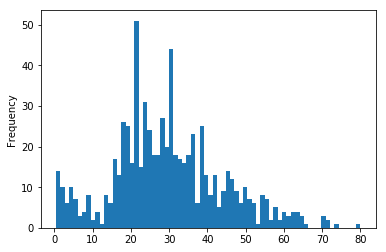

In [321]:
data['Age'].plot.hist(bins=70)

FROM THE ABOVE GRAPH IT CAN BE UNDERSTOOD THAT MAJORITY OF PASSENGERS HAVING AGE BETWEEN 12 TO 55 .
THERE ARE FEW OUTLIERS ON THE RIGHT SIDE OF AGE >65 , WHICH CAN BE REMOVED .

In [322]:
for i in range(len(data)):
    if(data['Age'][i]>65):
        data['Age'][i]=25

C:\Users\user\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


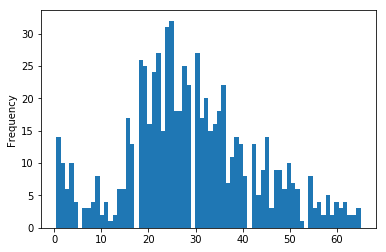

In [323]:
data['Age'].plot.hist(bins=70)

In [324]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

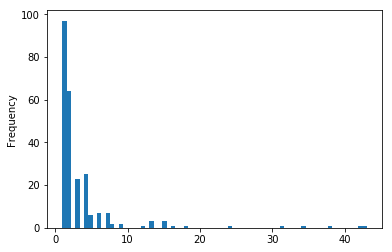

In [325]:
data['Fare'].value_counts().plot.hist(bins=70)

In [326]:
pd.crosstab(data['Survived'],data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


SURVIVAL RATE OF FEMALE IS HIGHER THAN MALE

In [327]:
pd.crosstab(data['Survived'],data['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


SURVIVAL RATE OF PASSENGER IS CLASS_1>CLASS_2>CLASS_3

IMPUTING MISSING VALUES

In [328]:
data['Age'].fillna(data['Age'].mode()[0],inplace=True)

In [329]:
data['Age'].mode()[0]

25.0

In [330]:
data['Cabin'].mode()[0]

'B96 B98'

In [331]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [332]:
data['Embarked'].mode()[0]

'S'

In [333]:
data['Embarked'].fillna('S',inplace=True)

In [334]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

CONVERTING ORDINAL CATEGORICAL VARIABLE USING LABEL ENCODING

In [335]:
l=range(len(data))
newCol=[]
for i in l:
    if(data['Age'][i]<15):
        newCol.append(0)
    elif (data['Age'][i]>15):
        newCol.append(1)
    else:
        newCol.append(2)
data['Age_Category']=newCol

In [336]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [337]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Category'],
      dtype='object')

In [338]:
data.drop('Name',axis=1,inplace=True)
data.drop('Cabin',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)


In [339]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

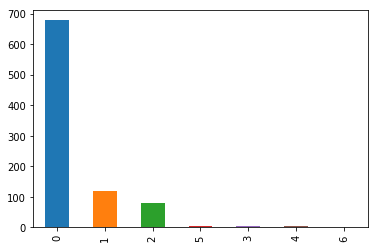

In [340]:
data['Parch'].value_counts().plot.bar()

In [341]:
l=range(len(data))
for i in l:
    if(data['Parch'][i]>2):
        data['Parch'][i]=0


C:\Users\user\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


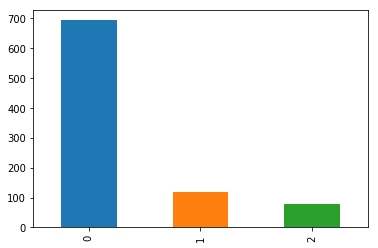

In [342]:
data['Parch'].value_counts().plot.bar()

ENCODING CATEGORICAL VARIABLES

In [343]:
cols=['Parch','Embarked','Pclass','SibSp','Sex']
data=pd.get_dummies(data,columns=cols)

In [344]:
data.head()

,PassengerId,Survived,Age,Fare,Age_Category,Parch_0,Parch_1,Parch_2,Embarked_C,Embarked_Q,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male
0,1,0,22.0,7.2500,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,2,1,38.0,71.2833,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3,1,26.0,7.9250,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5,0,35.0,8.0500,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [345]:
data.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Age_Category', 'Parch_0',
       'Parch_1', 'Parch_2', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Sex_female', 'Sex_male'],
      dtype='object')

SCALING DATA USING STANDARD SCALER

In [346]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
x=data.drop('Survived',axis=1)
y=data['Survived']
x=ms.fit_transform(x)

CREATING DATASET FOR TRAINING AND TESTING

In [347]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((712, 22), (179, 22), (712,), (179,))

IMPORTING LOGISTIC REGRESSION 

In [348]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [349]:
logreg.coef_

array([[ 1.00589756e-02, -3.46529338e-01,  1.26370975e-01,
        -2.60640682e-01, -2.73635494e-05,  3.71770080e-02,
        -4.40410363e-02,  4.41442936e-02,  5.36244886e-02,
        -7.24181481e-02,  4.24538880e-01,  1.28396821e-01,
        -4.70281258e-01,  1.13043579e-01,  1.50810207e-01,
        -4.62410797e-02, -2.37708459e-01, -2.65599959e-01,
        -3.26909200e-01, -1.71124554e-01,  6.31741824e-01,
        -6.31741824e-01]])

In [350]:
train_pred=logreg.predict(train_x)
#train_pred

In [351]:
test_pred=logreg.predict(test_x)
test_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

EVALUATION MODEL PERFORMANCE USING F1 SCORE

In [355]:
from sklearn.metrics import f1_score
train_score=f1_score(train_pred,train_y)
print("Training f1 score :",train_score)

Training f1 score : 0.7495219885277248


In [356]:
test_score=f1_score(test_pred,test_y)
print("Test f1 score :",test_score)

Test f1 score : 0.761904761904762


PREDICTING USING predict_proba() FUNCTION 

In [357]:
train_pred1=logreg.predict_proba(train_x)
train_pred1=train_pred1[:,1]

In [358]:
for i in range(len(train_pred1)):
    if(train_pred1[i]>0.55):
        train_pred1[i]=1
    else:
        train_pred1[i]=0
score=f1_score(train_pred1,train_y)
print("Train f1 score :",score)

Train f1 score : 0.73767258382643


In [359]:
test_pred1=logreg.predict_proba(test_x)
test_pred1=test_pred1[:,1]


In [360]:
for i in range(len(test_pred1)):
    if(test_pred1[i]>0.55):
        test_pred1[i]=1
    else:
        test_pred1[i]=0
score=f1_score(test_pred1,test_y)
print("Test f1 score :",score)

Test f1 score : 0.7394957983193275
